In [13]:
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ngrok = "https://9913-2600-1010-b0e3-425-a8de-445f-c65c-a74e.ngrok.io/"


In [2]:
train = pd.read_csv('train.csv')
train.head().T

,0,1,2,3,4
Datetime,2018-01-01 06:20:00+00:00,2018-01-01 06:40:00+00:00,2018-01-01 06:50:00+00:00,2018-01-01 10:40:00+00:00,2018-01-01 12:00:00+00:00
ActivePower,26.212347,59.632658,40.88965,34.398111,29.797653
AmbientTemperatue,28.696304,29.052567,28.984758,30.282058,29.333519
BearingShaftTemperature,NaN,NaN,NaN,NaN,NaN
Blade1PitchAngle,NaN,NaN,NaN,NaN,NaN
Blade2PitchAngle,NaN,NaN,NaN,NaN,NaN
Blade3PitchAngle,NaN,NaN,NaN,NaN,NaN
GearboxBearingTemperature,NaN,NaN,NaN,NaN,NaN
GearboxOilTemperature,NaN,NaN,NaN,NaN,NaN
GeneratorRPM,NaN,NaN,NaN,NaN,NaN


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77202 entries, 0 to 77201
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Datetime                      77202 non-null  object 
 1   ActivePower                   77202 non-null  float64
 2   AmbientTemperatue             76306 non-null  float64
 3   BearingShaftTemperature       50518 non-null  float64
 4   Blade1PitchAngle              33920 non-null  float64
 5   Blade2PitchAngle              33837 non-null  float64
 6   Blade3PitchAngle              33837 non-null  float64
 7   GearboxBearingTemperature     50520 non-null  float64
 8   GearboxOilTemperature         50532 non-null  float64
 9   GeneratorRPM                  50528 non-null  float64
 10  GeneratorWinding1Temperature  50546 non-null  float64
 11  GeneratorWinding2Temperature  50553 non-null  float64
 12  HubTemperature                50410 non-null  float64
 13  M

In [4]:
# check missing Dates
train['Datetime'].isnull().sum()

0

In [5]:
train['Datetime']= pd.to_datetime(train['Datetime']).dt.date

In [6]:
# check the relation between the datetime and all the columns
train.groupby('Datetime').mean()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
Datetime,,,,,,,,,,,,,,,,,,,
2018-01-01,366.223561,25.528849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.727612,74.042120,NaN,NaN,276.727612,5.263797
2018-01-02,462.550740,25.357526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.105603,93.555723,NaN,NaN,274.105603,5.390719
2018-01-03,454.417752,24.379363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.369130,91.627843,NaN,NaN,286.369130,5.295225
2018-01-04,369.952190,24.912347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.445471,74.360621,NaN,NaN,284.445471,5.094994
2018-01-05,319.446595,23.535679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.013293,64.366148,NaN,NaN,292.013293,4.915224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-11,466.289248,28.276232,44.059155,0.482881,0.934002,0.934002,64.106761,56.921031,1163.017505,67.939614,67.174603,38.635532,39.955577,183.729298,71.852813,10.420975,2.030612,183.729298,5.385570
2020-03-12,570.315539,29.094133,44.476550,1.206977,1.629283,1.629283,64.051326,56.194520,1217.638162,70.008635,69.288543,39.978688,40.757739,180.773250,84.040654,10.931663,2.033333,180.773250,5.693483
2020-03-13,619.637333,30.088163,45.903233,2.168904,2.609776,2.609776,65.348205,57.663415,1213.959374,72.745844,72.096953,39.562485,41.600482,187.621975,99.693231,10.884414,2.059259,187.621975,5.765318


/var/folders/bs/ft91t6rd10g_k96z24r42c1w0000gn/T/ipykernel_73920/3896096140.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


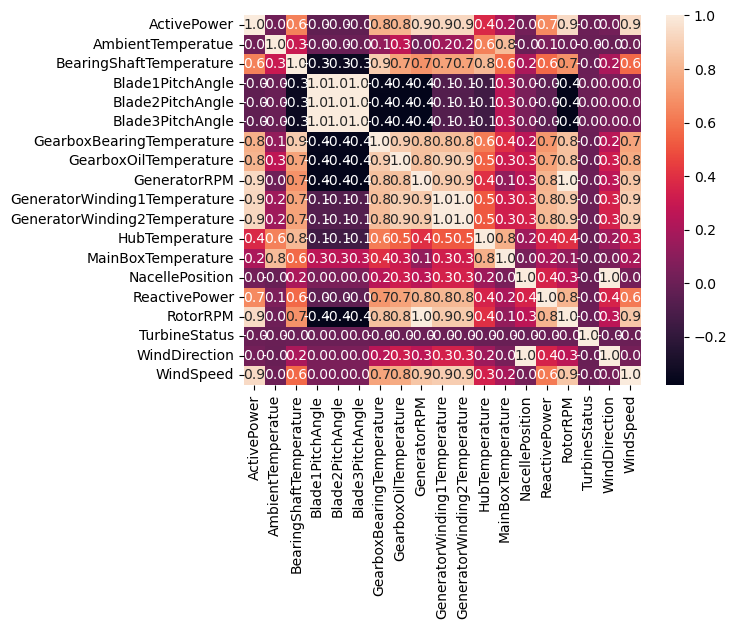

In [7]:
# heatmap to check the correlation between the columns .1f format
import seaborn as sns
corr = train.corr()
sns.heatmap(corr, annot=True, fmt='.1f')


train.index = train['Datetime']
# preserve the columns that have correlation with the ActivePower greater than 0.8
train = train[[x for x in train.columns if x != "Datetime" and train[x].corr(train['ActivePower']) > 0.9]]





In [19]:

train = train.groupby('Datetime').mean()

In [20]:
train

,ActivePower,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,RotorRPM,WindSpeed,y
Datetime,,,,,,,
2018-01-01,366.223561,NaN,NaN,NaN,NaN,5.263797,366.223561
2018-01-02,462.550740,NaN,NaN,NaN,NaN,5.390719,462.550740
2018-01-03,454.417752,NaN,NaN,NaN,NaN,5.295225,454.417752
2018-01-04,369.952190,NaN,NaN,NaN,NaN,5.094994,369.952190
2018-01-05,319.446595,NaN,NaN,NaN,NaN,4.915224,319.446595
...,...,...,...,...,...,...,...
2020-03-11,466.289248,1163.017505,67.939614,67.174603,10.420975,5.385570,466.289248
2020-03-12,570.315539,1217.638162,70.008635,69.288543,10.931663,5.693483,570.315539
2020-03-13,619.637333,1213.959374,72.745844,72.096953,10.884414,5.765318,619.637333


In [21]:
from prophet import Prophet

In [25]:
train['y'] = train['ActivePower']
train['ds'] = train.index

train.drop(['ActivePower'], axis=1, inplace=True)

#Prophet project
m = Prophet()

# add regressors
for col in train.columns:
    if col not in ['y', 'ds']:
        m.add_regressor(col)

#Fit with default settings
m.fit(train)
#Fataframe with forecasting steps
future = m.make_future_dataframe(periods=15)


ValueError: Found NaN in column 'GeneratorRPM'

In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)

Exception: Model has not been fit.

In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,664.142409,169.228650,822.547576,664.142409,664.142409,-174.570931,-174.570931,-174.570931,-4.714164,-4.714164,-4.714164,-169.856768,-169.856768,-169.856768,0.0,0.0,0.0,489.571477
1,2018-01-02,664.497004,198.489306,801.356571,664.497004,664.497004,-172.862358,-172.862358,-172.862358,-9.115370,-9.115370,-9.115370,-163.746988,-163.746988,-163.746988,0.0,0.0,0.0,491.634646
2,2018-01-03,664.851599,200.893772,860.566643,664.851599,664.851599,-148.564173,-148.564173,-148.564173,10.327979,10.327979,10.327979,-158.892152,-158.892152,-158.892152,0.0,0.0,0.0,516.287426
3,2018-01-04,665.206193,250.548872,874.209683,665.206193,665.206193,-116.981663,-116.981663,-116.981663,38.323608,38.323608,38.323608,-155.305271,-155.305271,-155.305271,0.0,0.0,0.0,548.224530
4,2018-01-05,665.560788,176.644945,821.965524,665.560788,665.560788,-166.339769,-166.339769,-166.339769,-13.371325,-13.371325,-13.371325,-152.968443,-152.968443,-152.968443,0.0,0.0,0.0,499.221020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2020-03-26,687.752480,221.980728,858.143596,687.726851,687.770074,-147.648547,-147.648547,-147.648547,38.323608,38.323608,38.323608,-185.972155,-185.972155,-185.972155,0.0,0.0,0.0,540.103934
745,2020-03-27,687.672831,159.512939,814.355165,687.635705,687.697913,-209.334475,-209.334475,-209.334475,-13.371325,-13.371325,-13.371325,-195.963150,-195.963150,-195.963150,0.0,0.0,0.0,478.338356
746,2020-03-28,687.593181,151.364347,784.993253,687.542781,687.627629,-211.294408,-211.294408,-211.294408,-4.598748,-4.598748,-4.598748,-206.695660,-206.695660,-206.695660,0.0,0.0,0.0,476.298773
747,2020-03-29,687.513531,118.294167,754.308929,687.449086,687.558555,-234.841546,-234.841546,-234.841546,-16.851980,-16.851980,-16.851980,-217.989566,-217.989566,-217.989566,0.0,0.0,0.0,452.671985
